<a href="https://colab.research.google.com/github/syauqidamario/dqlab/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aksara, bisa tolong bantu mengurus beberapa data penjualan dari dataset order.csv? Saya sedang rapat dan bahan ini ditunggu dalam pembahasan cabang supermarket kita. Berikut ya detailnya:

Median price yang dibayar customer dari masing-masing metode pembayaran.
Tentukan metode pembayaran yang memiliki basket size (rataan median price) terbesar.
Ubah freight_value menjadi shipping_cost dan cari shipping_cost termahal dari data penjualan tersebut menggunakan sort.
Untuk setiap product_category_name, berapa rata-rata weight produk tersebut dan standar deviasi mana yang terkecil dari weight tersebut,
Buat histogram quantity penjualan dari dataset tersebut untuk melihat persebaran quantity penjualan tersebut dengan bins = 5 dan figsize= (4,5)
Khusus poin 4, tolong diperhatikan lebih ya, Aksara karena hasil analisisnya akan digunakan kepala cabang dalam menyusun strategi free ongkir.

Kubalas email itu segera, OK! Hasilnya akan selesai sebelum makan siang ya. You can count on me, hehehe.

payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64
                               order_id  quantity  \
27220  41a207671f292d00ffea01b171f2a30b         1   
25006  4e64db31eb34a4e6c86235fedead69eb         1   
48803  588d8a3645cd2c4d3b9773d212a185e5         1   
25072  a7a43f469c0d7bdb0a23a82db125aefa         1   
20407  852b442a5bc38e624ea9f60305418cea         1   
...                                 ...       ...   
5651   217bb07ca5be930bc84e050acb4817c2         1   
4558   f0fc39347a86802c8df13bde9111b01a         1   
33858  724d428017f2d1e905e1e695296e90f5         1   
1350   90207c312f193fbd229671833bf08d47         1   
30807  95d1d57cd27cd0857ef85f53ad2ed3b8         1   

                             product_id    price  \
27220  7703b8cb5b77fbb36518ea91e2ca734f  3645000   
25006  f3663060e64c25fba789fe033263da67  2727000   
48803  20332c1e41e427864b3561a657caaf0d  1633000  

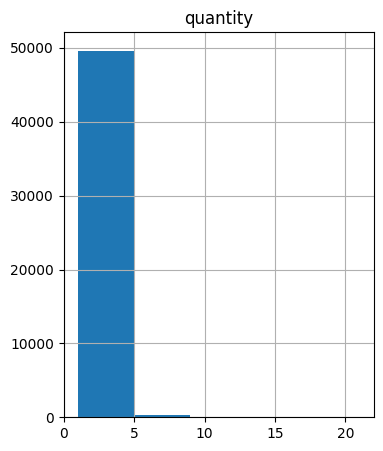

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

# Median price yang dibayar customer dari masing-masing metode pembayaran.
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

# Ubah freight_value menjadi shipping_cost dan cari shipping_cost
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

# Untuk product_category_name, berapa rata-rata weight produk tersebut
# dan standar deviasi mana yang terkecil dari weight tersebut,
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())

std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())

# Buat histogram quantity penjualan dari dataset tersebut untuk melihat persebaran quantity
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()

payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64

Metode pembayaran dengan basket size terbesar: virtual account (2643000.0)

Shipping Cost Termahal:
                               order_id  quantity  \
27220  41a207671f292d00ffea01b171f2a30b         1   
25006  4e64db31eb34a4e6c86235fedead69eb         1   
48803  588d8a3645cd2c4d3b9773d212a185e5         1   
25072  a7a43f469c0d7bdb0a23a82db125aefa         1   
20407  852b442a5bc38e624ea9f60305418cea         1   

                             product_id    price  \
27220  7703b8cb5b77fbb36518ea91e2ca734f  3645000   
25006  f3663060e64c25fba789fe033263da67  2727000   
48803  20332c1e41e427864b3561a657caaf0d  1633000   
25072  5eb564652db742ff8f28759cd8d2652a  4380000   
20407  01f76c07f91a533acd46cc6ab989be23  3278000   

                              seller_id  shipping_cost  \
27220  6560211a19b47992c3666cc44a7e94c0         2000

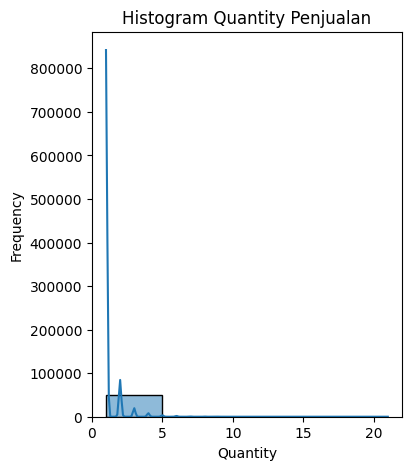


Statistik Deskriptif:
            quantity         price  shipping_cost  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000

Korelasi price vs quantity: -0.0016486228262350517


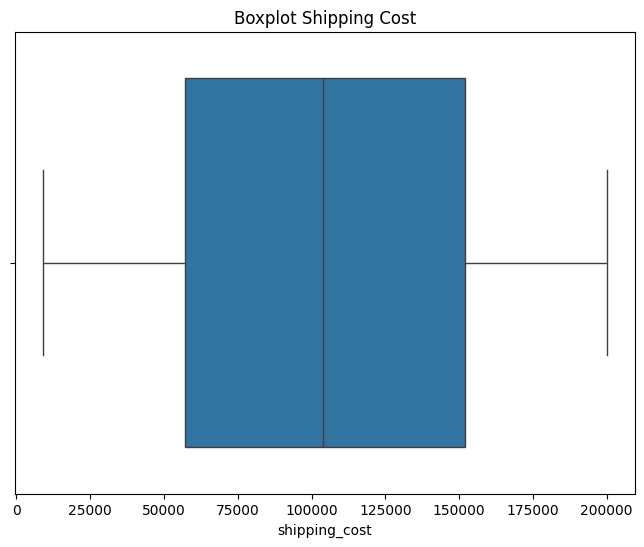

In [9]:
# Median price per payment_type
median_price = order_df.groupby("payment_type")["price"].median()
print(median_price)

# Payment_type dengan basket size terbesar
max_payment = median_price.idxmax()
print(f"\nMetode pembayaran dengan basket size terbesar: {max_payment} ({median_price[max_payment]})")

# Rename freight_value dan sort shipping_cost
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
print("\nShipping Cost Termahal:")
print(order_df.sort_values(by="shipping_cost", ascending=False).head())

# Mean dan Std dev product_weight_gram per product_category_name
mean_weight = order_df.groupby("product_category_name")["product_weight_gram"].mean().sort_values()
std_weight = order_df.groupby("product_category_name")["product_weight_gram"].std().sort_values()
print("\nRata-rata Weight per Product Category:\n", mean_weight)
print("\nStandar Deviasi Weight per Product Category:\n", std_weight)
print(f"\nProduct Category dengan std deviasi terkecil: {std_weight.idxmin()} ({std_weight.min()})")

# Histogram quantity
plt.figure(figsize=(4, 5))
sns.histplot(order_df["quantity"], bins=5, kde=True)
plt.title("Histogram Quantity Penjualan")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# Statistik deskriptif tambahan
print("\nStatistik Deskriptif:\n", order_df.describe())

# Korelasi price dan quantity
print("\nKorelasi price vs quantity:", order_df['price'].corr(order_df['quantity']))

# Boxplot shipping_cost
plt.figure(figsize=(8, 6))
sns.boxplot(x=order_df["shipping_cost"])
plt.title("Boxplot Shipping Cost")
plt.show()